In [1]:
%%html
<style>.text_cell .rendered_html * {direction: rtl; text-align: right;}</style>

## مقدمه

در این پروژه می خواهیم با استفاده از Naive Bayes classifirer و با داشتن بخشی از متن یک کتاب و همچنین تیتر آن، دسته بندی کتاب را پیش بینی کنیم.

ابتدا به خواندن و بررسی داده ها می پردازیم. در این پروژه به دلیل این که با داده های متنی سر و کار داریم ابتدا باید داده ها را پیش پردازش کنیم و سپس مدل را آموزش دهیم و با استفاده از داده های تست دقت مدل را به دست آوریم.

ابتدا کتاب خانه های مورد نیاز را import می کنیم.

In [2]:
import time
import pandas as pd
from hazm import *
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# سوال ۱)

## فاز اول: پیش پردازش داده ها

در این قسمت از کتابخانه ی هضم استفاده می کنیم. 
هر داده  ورودی که می خواهیم از آن برای آموزش مدل استفاده کنیم یک text می باشد. در این مدل سازی مکان کلمه ها در جمله و نقش آن ها برای ما اهمیتی ندارد و در این روش تنها مهم این است که تعداد استفاده از یک کلمه در یک کلاس چیست.  
برای پیش پردازش داده ها از موارد زیر استفاده می کنیم:  


#### word tokenizer

 با استفاده از این متد داده متنی را به کلمه هایی تبدیل می کنیم که با کاما از هم جدا شده اند.  
برای مثال برای جمله زیر داریم:  

text:  «جیرجیرک و مورچه» از مجموعه کتاب‌های داستانک‌های آموزنده فرانسه-فارسی برای زبان‌آموزان رده سنی ۸ تا ۱۲ سال است.

word tokenize : ['«', 'جیرجیرک', 'و', 'مورچه', '»', 'از', 'مجموعه', 'کتاب\u200cهای', 'داستانک\u200cهای', 'آموزنده', 'فرانسه-فارسی', 'برای', 'زبان\u200cآموزان', 'رده', 'سنی', '۸', 'تا', '۱۲', 'سال', 'است', '.']


#### جایگذاری نیم فاصله 

به دلیل این که در متد های بعدی کلمه هایی که \u200c داشتند را حذف می کرد بنابر این باید آن ها را جایگزین کنیم.   
word tokenize : ['«', 'جیرجیرک', 'و', 'مورچه', '»', 'از', 'مجموعه', 'کتاب\u200cهای', 'داستانک\u200cهای', 'آموزنده', 'فرانسه-فارسی', 'برای', 'زبان\u200cآموزان', 'رده', 'سنی', '۸', 'تا', '۱۲', 'سال', 'است', '.']
  
nim fasele:  ['«', 'جیرجیرک', 'و', 'مورچه', '»', 'از', 'مجموعه', 'کتاب های', 'داستانک های', 'آموزنده', 'فرانسه-فارسی', 'برای', 'زبان آموزان', 'رده', 'سنی', '۸', 'تا', '۱۲', 'سال', 'است', '.']  
ولی در نهایت استفاده نکردن از این روش تغییری در جواب نهایی ایجاد نکرد.


#### isalpha

کاراکتر هایی مثل '!', '-', ',' , \r , '<<' , '>>', اعداد و ...   را حذف می کند.  
alpha:     ['جیرجیرک', 'و', 'مورچه', 'از', 'مجموعه', 'آموزنده', 'برای', 'رده', 'سنی', 'تا', 'سال', 'است']


#### stemmer

 بخش اضافی کلمات (مخصوصا موارد مربوط به انتهای کلمه) را حذف می کند. مثلا ان، ی،... 
 به عنوان مثال کلمه بالاتر را به بالا تبدیل می کند.
 به نوعی تلاش می کند که اصل کلمه را نگه دارد.
  البته در همه مواقع خوب عمل نمی کند مثلا برای کلمه <عنوان> <ان> انتهای کلمه را حذف می کند و به <عنو> تبدیل می کند که بی معنی است.  
  و کلمه <معتقدان> را به <معتقد> تبدیل می کند که تغییر مناسب و کمک کننده ای است.  
  به طور کلی وقتی از این روش استفاده می کردم تغییر چشم گیری در نتیجه حاصل نمی شد به نوعی تاثیر مثبتی که داشت با شکستن بیش از اندازه کلمات از بین می رفت و در نهایت برای ما بی تاثیر می شد.

#### lemmatizer

کلمه را به ریشه های آن تبدیل می کند به عنوان مثال برای فعل ها هر دو بن فعل را نگه می دارد مثلا  'گذاشت' را به 'گذاشت#گذار' تبدیل می کند. در این صورت هر نوعی از این فعل را داشته باشیم آن رابه همین فرم در می آورد. 
به دلیل این که به قواعد دستور زبان مربوط می شود برای هر زبانی باید به طور جداگانه پیاده سازی شود. در این جا از کتابخانه هضم استفاده کردیم.
مثال دیگر:  
'دویدیم' -> 'دوید#دو' 

####  stop words

کلمه ها و حرف های اضافه پر تکراری که در هر متنی استفاده می شود را حذف می کنیم .
بخشی از این کلمات را در ادامه می بینیم:  
['کاملا', 'داشتن', 'نظیر', 'آمده', 'گروهی', 'فردی', 'ع', 'همچون', 'خطر', 'خویش', 'کدام', 'دسته', 'سبب', 'عین', 'آوری', 'متاسفانه', 'بیرون', 'دار', 'ابتدا', 'شش', 'افرادی', 'می\u200cگویند', 'سالهای', 'درون', 'نیستند', 'یافته_است', 'پر', 'خاطرنشان', 'گاه', 'جمعی', 'اغلب', 'دوباره', 'می\u200cیابد', 'لذا', 'زاده', 'گردد', 'اینجا']


### clean_text

برای پیش پردازش داده ها در نهایت پس از بررسی همه موارد به این نتیجه رسیدم که سه مورد استفاده شده بیشترین تاثیر را دارند و فقط از همین ها استفاده کردم.

In [3]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def clean_text(text):
    words = word_tokenize(text)
#     words = [w.replace('\u200c', '') for w in words]
#     words = [w.replace('-', '') for w in words]
#     words = [normalizer.normalize(w) for w in words]
#     words = [stemmer.stem(w) for w in words]
#     words = [lemmatizer.lemmatize(w) for w in words]
    words = [w for w in words if w.isalpha()]
    STOPS = set(stopwords_list())
    words = [w for w in words if not w in STOPS]
    return words

# سوال ۲)

## Naive Bayes

$$ \frac {P(x|c)P(C)} {P(x)} = P(c|x) $$

برای به دست آوردن کلاس یک داده  باید احتمال هر کلاس را برای آن داده به دست آوریم و در نهایت کلاسی که بیشترین احتمال را دارد انتخاب کنیم.

$$ (c_j|x_i)P $$   
likelihood: به این معنی است که احتمال کلاس به شرط مشاهده داده. یعنی برای یکxi description احتمال این که در کتگوری مثلا cj باشد چقدر است.  
در کدآن را به صورت words_count_cat[category][word]/ len(words_cat[category]) 
یعنی تعداد تکرار کلمه word در کلاس category تقسیم بر کل کلمه های کلاس کتگوری.

$$ (c_j)P $$  
Prior: احتمال کلاس cj که می شود تعداد کلمه های کلاس cjتقسیم بر تعداد کل کلمه های همه کلاس ها

به دلیل این که تعداد کلمه های همه کلاس ها با هم برابر است پس این احتمال برای همه کلاس ها برابر با ۱/۶ می شود.

$$P(x)$$
evidance: احتمال کلمه xi که به دلیل این که مخرج در همه احتمالات یکسان است دیگر آن را محاسبه نمی کنیم.

بنابر این با درنظر نگرفتن مخرج فرمول بالا به صورت زیر در می آید. 
$$ P(c|X) = P(x_1|c) P(x_2|c) .... P(x_n|c) P(c)$$

که اگر احتمال بالا را برای همه کلاس ها به دست آوریم. کلاسی که بیشترین احتمال را دارد جواب مسئله می باشد.

کتگوری ها کلاس ها و دیسکریپشن هر کتاب داده های ورودی می باشند.  
ابتدا مدل را با استفاده از داده های آموزشی ، train می کنیم. 
به این صورت که :  
ابتدا داده ها را بر اساس کلاس آن ها جدا می کنیم.   
سپس کلمات هر کلاس را به دست می آوریم و در دیکشنری word_cat ذخیره می کنیم.  
با استفاده از counter تعداد تکرار های هر کلمه در هر کلاس را به دست می آوریم. و در دیکشنری  word_count_cat ذخیره می کنیم.

In [4]:
def train(data_train, categories):
    words_cat = {}
    words_count_cat = {}
    for category in categories:
        temp = (data_train[data_train['categories'] == category]['description'])
        words_cat[category] = [element for t in temp for element in t]
        words_count_cat[category] = Counter(words_cat[category])
    return words_cat,words_count_cat

In [5]:
def test(data_test, categories, words_cat, words_count_cat, type):
    p_x_cat= {}
    predictions = []
    alpha = 1.5
    for row in data_test['description']:
        p_x_cat.clear()
        for category in categories:
            temp = 1
            for word in row:
                if type == 'smoothing':
                    temp *= ((words_count_cat[category][word] + alpha) / (len(words_cat[category])/100 + alpha*len(row)))
                if type == 'simple':
                    temp *= ((words_count_cat[category][word]) / (len(words_cat[category])/100))
            p_x_cat[category] = temp
        predictions.append(max(p_x_cat, key=p_x_cat.get))
    return predictions

برای همه تعداد کلمات یک کلاس به دلیل این که این مقدار به نسبت تعداد یک کلمه در کلاس بسیار زیاد بود حتا با  smoothing  هم به دلیل این که مخرج بزرگ بود و خود احتمال عدد کوچکی به دست می آمد، مقدار آن را برای همه کلاس ها تقسیم بر ۱۰۰ کردم.  

به جای این کار می توانستیم  از احتمالات  log  بگیریم و  max log را به دست بیاوریم.در این صورت به دلیل این که لگاریتم در استفاده کرده ایم برابر با این می شود که جمع لوگاریتم ها را به دست آوریم و در نهایت ماکسیمم بگیریم.  
که به صورت زیر در می آمد:

In [6]:
# temp += np.log((words_count_cat[category][word]) / (len(words_cat[category])

# سوال ۳)

مثالی از داده های داده شده: 
کلمه جابرابن سمره  در حالت unigram  به صورت 'جابر', 'بن', 'سمره'  می باشد  که در این صورت معنی نمی دهد. و متوجه نمی شویم که یک اسم است.  
در حالی که اگر 3gram داشتیم کلمه به صورت  جابر ابن سمره در می آمد.   
مثال دیگر چشم انداز  است که اگر bigram داشتیم معنی واقعی کلمه را دربرمی گرفت ولی الان به  چشم و انداز تقسیم شده است که معنی کاملا متفاوتی دارند.  
انتخاب این که برای مدل gram  چندتایی باید درنظر بگیریم را با استفاده از داده های validation  می توان انجام داد. و هرکدام که خطای کمتری داشت را به عنوان پارامتر مناسب درنظر گرف.


# سوال ۴)

برای استفاده از الگوریتم NAive Bayes  احتمال ها را در هم ضرب می کردیم.   
دو حالت زیر را در نظر می گیریم:  
    ۱) یک کلمه در هیچ کدام از کلاس ها نباشد:‌  
    در این صورت P(x|c) برای همه کلاس ها صفر می شود. یعنی آن کلمه در هیچ کدام از کلاس ها که با داده های آموزشی تشکیل داده شده اند قرار ندارد.   
    در این حالت P(c|x)   هم برای آن نمونه تست، صفر می شود و در نتیجه مدل ما نمی تواند کلاس مناسب آن داده را به دست آورد.  
    ۲) یک کلمه از یک نمونه تست فقط در یکی از کلاس ها وجود دارد:  
    در این حالت P(x|c) برای همان کلاسی که کلمه را دارد مقدار دارد و برای بقیه کلاس ها صفر است. در این صورت حتا اگر تعداد تکرار های بقیه کلمه ها در کلاس های دیگر زیاد باشد ولی چون یک کلمه را نداشتند احتمالشان صفر می شود. و مدل نمی تواند به درستی کلاس را تشخیص دهد.  
    در واقع اگر کلمه ای فقط در یک کلاس باشد، بدون توجه به بقیه کلمه های آن نمونه، مدل ما کلاس آن داده را همان کلاسی تشخیص می دهد که آن یک کلمه در آن وجود داشت.

# سوال ۵) additive smoothing

additive smoothing  یا laplace smoothing  برای از بین بردن مشکلی که در بخش قبل گفته شد به کار می رود.  
یعنی هنگام محاسبه P(x|c) با اضافه کردن ترمی در صورت و مخرج آن از صفر شدن آن جلوگیری می کنیم. در این صورت اگر کلمه ای در یک کلاس وجود نداشت مقدار احتمال را صفر نمی دهد. 

 $$ P(w|c) =\frac {\text{number of word w in category c}+\alpha} {\text{number of words in category c}+ {\alpha * \text{number of words in category c}}}  $$

## اجرای برنامه

In [7]:
t1 = time.time()
data_train = pd.read_csv('books_train.csv')
data_test = pd.read_csv('books_test.csv')
data_train['description'] = data_train['description'].apply(clean_text)
data_test['description'] = data_test['description'].apply(clean_text)
categories = data_train['categories'].unique()
words_cat,words_count_cat = train(data_train, categories)
t2 = time.time()
print('time =  ', t2-t1)

time =   2.707751989364624


## simple Test:

In [8]:
predictions_simple = test(data_test, categories, words_cat, words_count_cat, 'simple')
accuracy = np.sum(predictions_simple == data_test['categories']) / (len(data_test))
print(f'acc = {accuracy*100} %')

acc = 25.77777777777778 %


## additive smoothing test:  
همان طور که مشاهده می شود دقت در این حالت ۸۰ درصد شده است.

In [9]:
predictions = test(data_test, categories, words_cat, words_count_cat, 'smoothing')
accuracy = np.sum(predictions == data_test['categories']) / (len(data_test))
print(f'acc = {accuracy*100} %')

acc = 80.22222222222221 %


# سوال ۶)

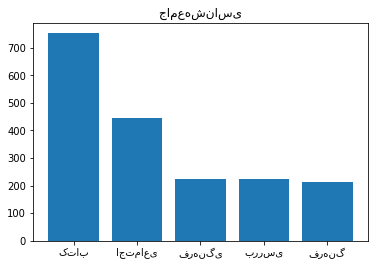

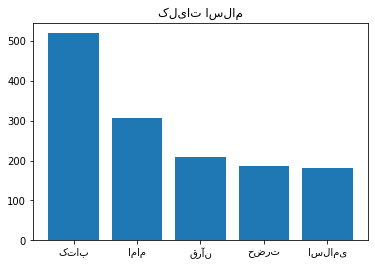

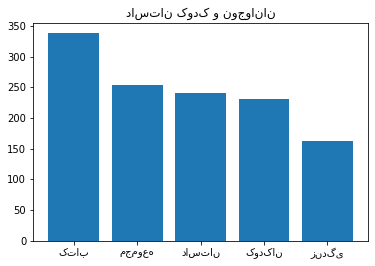

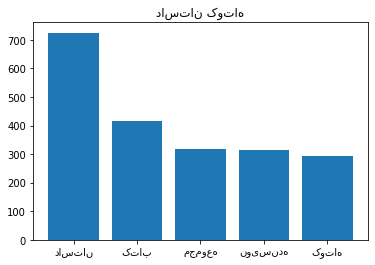

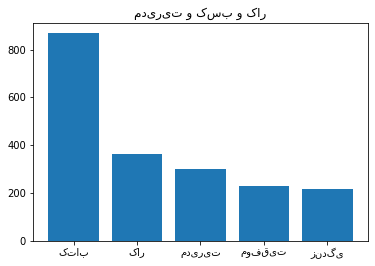

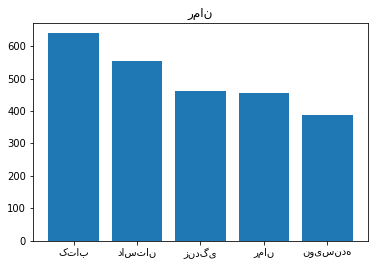

In [10]:
for c in categories:
    plt.figure()
    plt.title(c)
    temp = (words_count_cat[c].most_common(5))
    keys = [k[0] for k in temp]
    values = [v[1] for v in temp]
    plt.bar(keys, values)
    plt.show()

# سوال ۷)

conffusion matrix: ماتریسی است که در هر ستون مقدار حقیقی آن کلاس ور در هسر مقدار پیش بینی شده را نشاد می دهد.
    همان طور که مشاهده می شود در قطر اصلی اعداد بزرگ تر هستند به دلیل این که دقت مدل ما ۸۰ درصد بود و اکثر کلاس ها درست تشخیص داده شده اند.  
    همچنین می توان متوجه شد که مثلا کتاب های جامعه شناسی اغلب اشتباه تشخیص داده شده اند.  
    همچنین دسته رمان و داستان کوتاه هم به نسبت زیاد با یکدیگر اشتباه تشخیص داده شده اند که همچین مشکلی طبیعی و قابل حدس بود چرا که این دو ژانر بسیار شبیه به هم هستند. 
   و همچنین به نظر می رسد که کلیات اسلام خوب تشخیص داده شده است چون در ستون کلیات اسلام مقدار آن برای سطر کلیات اسلام زیاد و برای بقیه سطر ها بسیار کم می باشد.  
    در ادامه بیشتر توضیح داده خواهد شد.

این ماتریس به صورت دستی به شکل زیر پیاده سازی می شود.
و سپس با استفاده از کتابخانه پانداس  صحت آن را بررسی می کنیم.

In [11]:
conf_matrix = np.zeros(shape=(len(categories), len(categories)))
conf_df = pd.DataFrame(conf_matrix, columns=categories, index=categories)

for c in categories:
    for row in range(len(predictions)):
        if data_test['categories'][row] == predictions[row] == c:
            conf_df[c][c] += 1
        elif data_test['categories'][row] != predictions[row] and data_test['categories'][row] == c:
            conf_df[predictions[row]][c] += 1
conf_df

,جامعه‌شناسی,کلیات اسلام,داستان کودک و نوجوانان,داستان کوتاه,مدیریت و کسب و کار,رمان
جامعه‌شناسی,64.0,1.0,3.0,1.0,5.0,1.0
کلیات اسلام,10.0,62.0,2.0,1.0,0.0,0.0
داستان کودک و نوجوانان,0.0,2.0,68.0,3.0,0.0,2.0
داستان کوتاه,4.0,1.0,9.0,49.0,1.0,11.0
مدیریت و کسب و کار,7.0,0.0,0.0,0.0,68.0,0.0
رمان,7.0,1.0,4.0,12.0,1.0,50.0


In [12]:
def confusion_matrix(data_test,predictions):
    df_confusion = pd.crosstab( data_test['categories'].reset_index(drop=True), pd.Series(predictions))
    return df_confusion

In [13]:
def RP(df_confusion,categories):
    recall = {}
    precision = {}
    for c in categories:
        precision[c] = df_confusion[c][c] / df_confusion.sum(axis=0)[c]
        recall[c] = df_confusion[c][c] / df_confusion.sum(axis=1)[c]
    return recall,precision

### Recall

برای کلاس c مقدار recall برابر است با تعداد پیش بینی های درست کلاس  تقسیم بر  تعداد واقعی آن کلاس  که همان تعداد پیش بینی های درست به اضافه تعداد پیش بینی های غلط برای کلاس c است.  
از روی confusion matrix بالا مخرج برای recall برابر است با مجموع ستون هر کلاس

$$  Recall = \frac {\text{correct detected class}} {\text{total class}} = \frac {\text {True pos}} {\text{True pos + False Negative}}$$

### Precision

برای کلاس c مقدار percision برابر است با تعداد پیشبینی های درست کلاس c تقسیم بر تعداد داده هایی که کلاس آن ها c تشخیص
داده شده (چه درست و چه غلط)

از روی confusion matrix بالا مخرج برای precision برابر است با مجموع سطر هر کلاس

$$  Precision = \frac {\text{correct detected class}} {\text{all detected class}} = \frac {\text {True pos}} {\text{True pos + False pos}}$$

## تحلیل recall  و precision 

مثلا کلاس مدیریت کسب و کار را در نظر بگیرید.
مقدار recall  برای این کلاس به این معنی است که از بین داده هایی که کلاس آن ها واقعا مدیریت کسب و کار بوده چه درصدی درست پیش بینی شده اند
که همان طور که مشاهده می شود مقدار آن ۹۰ درصد و بسیار زیاد است و این را از ماتریس confusion  هم قابل مشاهده بود.
مثلا برای کلاس جامعه شناسی: مقدار recall آن بالا است به این معنی که از بین داده هایی که واقعا در کلاس جامعه شناسی بوده اند درصد خوبی درست تشخیص داده شده اند.

از طرف دیگر مقدار precision  برای کلاس جامعه شناسی به این معنی است که از بین همه داده هایی که کلاس آن ها جامعه شناسی پیش بینی شده،چه درصدی واقعا کلاس آن ها جامعه شناسی بوده. 
که مشاهده می شود این مقدار برای کلاس جامعه شناسی ۶۰ درصد و کم است.
از ماتریس هم مشخص بود که تعداد پیش بینی های غلط برای کلاس جامعه شناسی زیاد بود.

زیاد بودن  به تنهایی کافی نیست. به دلیل این که همان طور که توضیح داده شد :  
برای precision : مثلا وقتی پیش بینی می کنیم که  کلاس یک داده رمان است اگر precision بالا باشد یعنی احتمال این که کلاس آن داده واقعا رمان باشد زیاد است و احتمال این که اشتباه گفته باشیم کم است.  

برای recall:  ولی مثلا اگر recall برای کلاس رمان زیاد باشد به این معنی است که اگر یک داده واقعا در کلاس رمان باشد درصد بالایی احتمال دارد که کلاس رمان برای آن پیش بینی شود.

بنابر این مطلوب ما بالا بودن recall و precision   به طور همزمان است.

# سوال ۸)

به این منظور از F score  استفاده می کنیم:  
    

$$  F1 = \frac {\text{2* Precision*Recall}} {\text{Precision}+ \text{Recall}}$$

در این حالت هر دو P و R باید زیاد باشند تا مقدار خطا کم باشد و دقت بالا باشد.  
در این حالت هرکدام از P و R کم باشند مقدار F1 کم خواهد بود.  
در F1 از harmonic mean استفاده می شود به این صورت عمل می کند که به مقداری که کوچک تر است وزن بیشتری می دهد.و در واقع کم بودن هر کدام از آن ها در مقدار نهایی تاثیر می دهد.

فرمول بالا برای ۲ کلاس است و پس از محاسبه آن به تعداد کلاس ها f1 score خواهیم داشت برای تبدیل آن به یک عدد از روش های بخش بعد استفاده می کنیم.

In [14]:
def F_score(precision, recall, categories):
    F_score = {}
    for c in categories:
        F_score[c] = (2 * precision[c] * recall[c]) / ( precision[c] + recall[c])
    return F_score

# سوال ۹)

### macro F1

مجموع همه F1 score  ها تقسیم بر تعداد کلاس ها  
در این روش به همه کلاس ها وزن یکسان می دهد

In [15]:
def Macro_F(F_score, categories):
    macro_F1 = sum(F_score.values())/len(categories)
    print('macro_F1 = ', macro_F1)
    return macro_F1

### weighted F1

در این حالت به هر کلاس یک وزنی می دهیم. و وزن هر کلاس برابر است با تعداد نمونه های آن کلاس.

ابتدا تعداد نمونه های هر کلاس را برای داده تست به دست می آوریم.

In [16]:
def Weighted_F(data_test, F_score, categories):
    data_test_classification = data_test['description'].groupby(data_test['categories']).agg('count')
    sum_weighted_F1 = 1
    for c in categories:
        sum_weighted_F1 += (data_test_classification[c] * F_score[c])
    weighted_F1 = sum_weighted_F1 / sum(data_test_classification)
    print('weighted_F1 = ', weighted_F1)
    return weighted_F1

### micro F1

$$ \frac {\text {total True Pos}} {\text {total True Pos} + \text {total False Pos}} $$

In [17]:
def Micro_F(df_confusion, categories):
    TP = 0
    FP = 0
    for c in categories:
        TP += df_confusion[c][c]
        FP += df_confusion.drop(c, axis=0).sum(axis=0)[c]
    micro = TP/(TP+FP)
    return micro

# سوال ۱۰)

# نتایج بدون استفاده از smoothing

مقادیر بالا را برای نتیجه بدون استفاده از smoothing به دست می آوریم:
    

In [18]:
confusion_matrix_s = confusion_matrix(data_test,predictions_simple)
confusion_matrix_s

col_0,جامعه‌شناسی,داستان کوتاه,داستان کودک و نوجوانان,رمان,مدیریت و کسب و کار,کلیات اسلام
categories,,,,,,
جامعه‌شناسی,75,0,0,0,0,0
داستان کوتاه,70,2,1,1,0,1
داستان کودک و نوجوانان,51,0,23,1,0,0
رمان,75,0,0,0,0,0
مدیریت و کسب و کار,71,0,0,1,3,0
کلیات اسلام,62,0,0,0,0,13


In [19]:
recall_s , precision_s = RP(confusion_matrix_s, categories)
recall_s

{'جامعه\u200cشناسی': 1.0,
 'کلیات اسلام': 0.17333333333333334,
 'داستان کودک و نوجوانان': 0.30666666666666664,
 'داستان کوتاه': 0.02666666666666667,
 'مدیریت و کسب و کار': 0.04,
 'رمان': 0.0}

In [20]:
precision_s

{'جامعه\u200cشناسی': 0.18564356435643564,
 'کلیات اسلام': 0.9285714285714286,
 'داستان کودک و نوجوانان': 0.9583333333333334,
 'داستان کوتاه': 1.0,
 'مدیریت و کسب و کار': 1.0,
 'رمان': 0.0}

در این جا کلاس رمان به دلیل این که پیش بینی درستی نداشته است بنابر این مقدار آن صفر است و  F score آن چون تقسیم بر  صفر دارد قابل محاسبه نمی باشد.

In [21]:
F_score_s = F_score(precision_s, recall_s, categories)
F_score_s

<ipython-input-14-c7639fa74ec6>:4: RuntimeWarning: invalid value encountered in double_scalars
  F_score[c] = (2 * precision[c] * recall[c]) / ( precision[c] + recall[c])


{'جامعه\u200cشناسی': 0.31315240083507306,
 'کلیات اسلام': 0.29213483146067415,
 'داستان کودک و نوجوانان': 0.4646464646464646,
 'داستان کوتاه': 0.05194805194805195,
 'مدیریت و کسب و کار': 0.07692307692307693,
 'رمان': nan}

In [22]:
macro_F_s = Macro_F(F_score_s, categories)
macro_F_s

macro_F1 =  nan


nan

In [23]:
Weighted_F_s = Weighted_F(data_test, F_score_s, categories)
Weighted_F_s

weighted_F1 =  nan


nan

فقط در حالت میکرو به دلیل این که دیگر تقسیم بر صفر نداریم دقت  همانند acc به دست می آید.

In [24]:
Micro_F_s = Micro_F(confusion_matrix_s, categories)
Micro_F_s

0.2577777777777778

# نتایج با استفاده از smoothing:

In [25]:
confusion_matrix_smooth = confusion_matrix(data_test, predictions)
confusion_matrix_smooth

col_0,جامعه‌شناسی,داستان کوتاه,داستان کودک و نوجوانان,رمان,مدیریت و کسب و کار,کلیات اسلام
categories,,,,,,
جامعه‌شناسی,64,1,3,1,5,1
داستان کوتاه,4,49,9,11,1,1
داستان کودک و نوجوانان,0,3,68,2,0,2
رمان,7,12,4,50,1,1
مدیریت و کسب و کار,7,0,0,0,68,0
کلیات اسلام,10,1,2,0,0,62


In [26]:
recall_smooth , precision_smooth = RP(confusion_matrix_smooth, categories)
recall_smooth

{'جامعه\u200cشناسی': 0.8533333333333334,
 'کلیات اسلام': 0.8266666666666667,
 'داستان کودک و نوجوانان': 0.9066666666666666,
 'داستان کوتاه': 0.6533333333333333,
 'مدیریت و کسب و کار': 0.9066666666666666,
 'رمان': 0.6666666666666666}

In [27]:
precision_smooth

{'جامعه\u200cشناسی': 0.6956521739130435,
 'کلیات اسلام': 0.9253731343283582,
 'داستان کودک و نوجوانان': 0.7906976744186046,
 'داستان کوتاه': 0.7424242424242424,
 'مدیریت و کسب و کار': 0.9066666666666666,
 'رمان': 0.78125}

In [28]:
F_score_smooth = F_score(precision_smooth, recall_smooth, categories)
F_score_smooth

{'جامعه\u200cشناسی': 0.7664670658682634,
 'کلیات اسلام': 0.8732394366197183,
 'داستان کودک و نوجوانان': 0.8447204968944099,
 'داستان کوتاه': 0.6950354609929078,
 'مدیریت و کسب و کار': 0.9066666666666666,
 'رمان': 0.7194244604316546}

In [29]:
macro_F_smooth = Macro_F(F_score_smooth, categories)
macro_F_smooth

macro_F1 =  0.8009255979122701


0.8009255979122701

In [30]:
Weighted_F_smooth = Weighted_F(data_test, F_score_smooth, categories)
Weighted_F_smooth

weighted_F1 =  0.8031478201344924


0.8031478201344924

In [31]:
Micro_F_smooth = Micro_F(confusion_matrix_smooth, categories)
Micro_F_smooth

0.8022222222222222

# سوال ۱۱)

بدون استفاده از smoothing با استفاده از روش های میانگین گیری  weighted , macro مقدار f صفر به دست می آمد.
یعنی در صورتی که استفاده نکردن از  smoothing  تاثیر زیادی بر دقت داشته باشد به صورتی که برای یک کلاس هیچ داده ای را درست تشخیص نداده باشد ، قطعا هم دقت پایین خواهد بود و هم  F score  ها مقداری نخواهند داشت.
و همچنین اگر شرایط گفته شده پیش نیاید همه مقادیر محاسبه شده با هم برابر خواهد بود.  
در روش با smoothing می توان این موضوع را مشاهده کرد.

# سوال ۱۲)

In [32]:
for i in range(23):
    if not data_test['categories'][i] == predictions[i]:
        # i += 1
        print(i, ' th data')
        print('description:', data_test['description'][i])
        print('predicted category: ', predictions[i])
        print('actual category: ', data_test['categories'][i])

0  th data
description: ['کآشوب', 'بیست', 'روایت', 'زندگی', 'همت', 'نفیسه', 'مرشدزاده', 'کآشوب', 'واقعی', 'مستند', 'امروز', 'سال', 'هجری', 'شهادت', 'مظلومانه', 'امام', 'حسین', 'نویسندگان', 'شغل', 'مختلف', 'قرار', 'لحن', 'توصیفی', 'خودشان', 'مجالس', 'گذشته', 'امروز', 'گزارش', 'دل', 'دست', 'شیفتگی', 'مجموعه', 'مداوم', 'اثری', 'عاشورا', 'محرم', 'تولید', 'تولد', 'هزارانی', 'پیشکش', 'روایت', 'هفتم', 'فراز', 'تپه', 'علی', 'غبیشاوی', 'شانزده', 'هفده', 'بودم', 'ماه', 'تابستان', 'تعطیلات', 'سال', 'نو', 'قم', 'کاری', 'نداشتیم', 'خوزستان', 'روستای', 'پدری', 'محرم', 'تعطیلات', 'محرم', 'قم', 'نبودیم', 'روز', 'داشتم', 'اتصالی', 'باندهای', 'حیاط', 'وصله', 'داشتم', 'میخ', 'عقبی', 'منبر', 'چکش', 'سر', 'جایش', 'بالای', 'نردبان', 'داشتم', 'تار', 'گوشه', 'حسینیه', 'چطور', 'ماه', 'قم', 'شوم', 'نامانوس', 'عزاداری', 'عربی', 'عادت', 'نداشتم', 'دلهره', 'داشتم', 'محرم', 'روز', 'عاشورا', 'برگشتم', 'قم', 'زندگی', 'خوزستان', 'کمتر', 'حضورم', 'شهر', 'منحصر', 'عربی', 'خانواده', 'روزمره', 'لغات', 'محدود', 'ساختار', '

از طرفی طبیعی است که مثلا داستان کوتاه و رمان و داستان کودک و نوجوان شباهت هایی داشته باشند و تشخیص آن ها سخت تر باشد و دقت پایین تری داشته باشند.  
و از طرف دیگر در مثال دوم مثلا: کتاب رمان جورج اورول رمانی است که محتوای اجتماعی دارد و تشخیص دسته بندی آن با استفاده از تعداد کمی کلمات دشوار است. به نظر می رسد در این مورد تعداد ویژگی کم  باعث این  misclassification  شده است. یعنی اگر تعداد بیشتری از کلمات این کتاب را در دسترس داشتیم احتمالا مدل ما متوجه می شد که مثلا نام حیوانات یا اسامی زیاد تکرار شده اند و شاید دیگر در دسته اجتماعی قرار نمی داد.  
از طرف دیگر راه حلی که به نظرم می آید این است که تعداد تکرار در کلمه در خود نمونه تست را هم در نظر بگیریم و در تسخیص کلاس تاثیر بدهیم.  
در مورد مثال آخر  به دلیل این که در کتاب های اسلامی سرگذشت هم داریم ممکن است منجر به پیش بینی کلاس اشتباه با داستان و رمان شود. در این مورد به نظر می رسد که مشکل از پیش پردازش داده ها بوده چون مثلا کلمه پیامبر در مدل برای کلاس کلیات اسلام به صورت زیر است:  
  
  پیامبر : 68  
  پیامبران : 15  
  پیامبرصلی : 3  
  پیامبرش :2  
  پیامبری : 2  
  پیامبرت : 1 
  
   پیامبرانه: 1  
   
   در این مورد آخر احتمالا اگر  stemmer را در پیش پردازش داده ها انجام می دادم همه این کلمات به پیامبر ( یا پیام)  تبدیل می شدند و تعداد این کلمه در کلاس کلیات اسلام بیشتر می شد و در این صورت شاید احتمال این نمونه آموزشی که کلمه پیامبر را دارد  برای کلاس کلیات اسلام بزرگ تر می شد و کلاس اشتباهی را انتخاب نمی کرد.

# نتیجه گیری

 در text classification  پیش پپردازش داده ها بسیار اهمیت دارد. و همچنین باید حتما حواسمان به  داده های جدید باشد .  
 دقت را برای داده های تست ارزیابی کنیم و از صحت مدل اطمینان حاصل کنیم.

In [33]:
import os
os.system('jupyter nbconvert --to html AI_CA3_810896059.ipynb')

0